In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-features/FYDP Final Dataset_8000.xlsx
/kaggle/input/news-features/feature.csv


In [2]:
%pip install scikit-multilearn
%pip install arff
%pip install neattext
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... - \ done
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4970 sha256=1c757679e37d263de9db84a94eb84d36e5ccde02b7609ed943f5489315170845
  Stored in directory: /root/.cache/pip/wheels/0c/39/12/4d8ff491018bce2dd9cc6034298f27399c7f4fd4063187f7be
Successfully built arff
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import neattext as nt
import neattext.functions as nfx
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
dataset = pd.read_excel('/kaggle/input/news-features/FYDP Final Dataset_8000.xlsx')

/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell D2614 is marked as a date but the serial value 6692030.0 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


In [5]:
print(dataset.head(2))

  Unnamed: 0                                          HEADLINES  \
0        NaN  Govt to face murder charge if anything bad hap...   
1        NaN  EC faces question for holding election at nigh...   

                                                NEWS                 DATE  \
0  BNP on Wednesday warned that everyone in the c...  2022-01-05 00:00:00   
1  Referring to the incidents of ballot snatching...  2022-01-05 00:00:00   

                                                LINK       SOURCE  BANGLADESH  \
0  https://en.prothomalo.com/bangladesh/politics/...  PROTHOM ALO         1.0   
1  \n https://en.prothomalo.com/bangladesh/politi...  PROTHOM ALO         1.0   

   POLITICS  CRIME  ECONOMY  ...  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0         1      0        0  ...          NaN          NaN          NaN   
1         1      1        0  ...          NaN          NaN          NaN   

   Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  \
0          NaN          Na

In [6]:
dataset = dataset.dropna(axis=1)

In [7]:
dataset.head()

,HEADLINES,NEWS,SOURCE,POLITICS,CRIME,ECONOMY,ENTERTAINMENT,INTERNATIONAL,SPORTS,TECHNOLOGY
0,Govt to face murder charge if anything bad hap...,BNP on Wednesday warned that everyone in the c...,PROTHOM ALO,1,0,0,0,0,0,0
1,EC faces question for holding election at nigh...,Referring to the incidents of ballot snatching...,PROTHOM ALO,1,1,0,0,0,0,0
2,Sammobadi Dal wants election time govt under P...,A delegation of Bangladesh Sammobadi Dal on Tu...,PROTHOM ALO,1,0,0,0,0,0,0
3,Personal images of candidates take precedence ...,Personal images of the candidates have become ...,PROTHOM ALO,1,0,0,0,0,0,0
4,BNP to hold talks with political parties,As the Bangladesh National Party (BNP) is dete...,PROTHOM ALO,1,0,0,0,0,0,0


In [8]:
dataset.SOURCE.value_counts()

NEWAGE                   1738
The Daily Star           1345
THE BUSINESS STANDARD    1289
PROTHOM ALO              1286
ASSOCIATED PRESS          725
Dhaka Tribune             587
Al Jazeera                342
CNN                       261
theindependent            198
THE STRAITS TIMES         115
BBC                        96
Prothom Alo                 9
REUTERS                     8
The New York Times          3
Name: SOURCE, dtype: int64

In [9]:
y = dataset[['POLITICS', 'CRIME', 'ECONOMY',
       'ENTERTAINMENT', 'INTERNATIONAL', 'SPORTS', 'TECHNOLOGY']]

In [10]:
names = ['POLITICS', 'CRIME', 'ECONOMY',
       'ENTERTAINMENT', 'INTERNATIONAL', 'SPORTS', 'TECHNOLOGY']

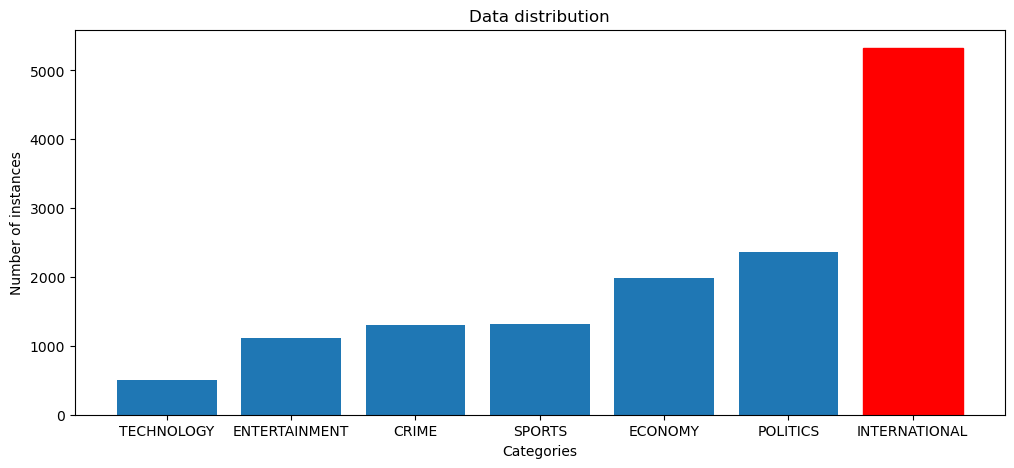

In [11]:
plt.figure(figsize=(12,5))
y_sum = y.sum()
y_sum.sort_values(inplace=True)
barlist = plt.bar(y_sum.index.to_list(),y_sum.values)
plt.title('Data distribution')
plt.xlabel('Categories')
plt.ylabel('Number of instances')
barlist[-1].set_color('red')
plt.show()

In [12]:
dataset['NEWS'].apply(lambda x:nt.TextFrame(x).noise_scan())

0       {'text_noise': 10.173160173160174, 'text_lengt...
1       {'text_noise': 9.253974724826742, 'text_length...
2       {'text_noise': 7.738748627881449, 'text_length...
3       {'text_noise': 8.503891611415392, 'text_length...
4       {'text_noise': 7.981553742461866, 'text_length...
                              ...                        
7997    {'text_noise': 8.607480847228482, 'text_length...
7998    {'text_noise': 8.639523336643496, 'text_length...
7999    {'text_noise': 11.368015414258188, 'text_lengt...
8000    {'text_noise': 7.496251874062969, 'text_length...
8001    {'text_noise': 8.174178762414057, 'text_length...
Name: NEWS, Length: 8002, dtype: object

In [13]:
dataset['NEWS'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0       [on, that, everyone, in, the, will, be, with, ...
1       [to, the, of, at, various, on, it, is, to, thi...
2       [a, of, on, at, to, their, and, on, the, of, a...
3       [of, the, have, become, more, than, the, in, t...
4       [as, the, is, to, the, of, with, on, the, of, ...
                              ...                        
7997    [to, and, to, against, after, such, was, to, h...
7998    [has, the, first, through, a, at, the, was, at...
7999    [after, the, last, has, that, a, is, in, the, ...
8000    [a, has, in, by, and, of, in, an, from, to, ev...
8001    [on, us, and, its, of, the, first, towards, a,...
Name: NEWS, Length: 8002, dtype: object

In [14]:
corpus = dataset['NEWS'].apply(nfx.remove_stopwords)

In [15]:
wordcloud = WordCloud(max_words=50,background_color='white').generate(str(corpus.to_list()))

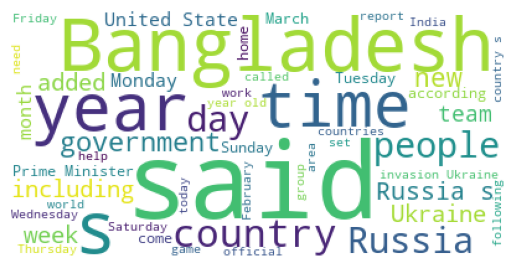

In [16]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [17]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, CategoricalNB

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, hamming_loss, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer()
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [19]:
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.2,random_state=42)

In [20]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset



In [21]:
def experiments(classifire_list):
    accuracy = []
    def classification(base_classifire,wrapper):
        clf=wrapper(base_classifire)
        clf.fit(X_train,y_train)
        prediction = clf.predict(X_test)
        return {type(base_classifire).__name__:(accuracy_score(y_test,prediction), 
                                      classification_report(y_test,prediction))
               }
    
    for i in classifire_list:
        accuracy.append(classification(i,BinaryRelevance)) #gauss = 39% MNB = 35% RF = 51%
    return accuracy

In [22]:
classifirelist = [RandomForestClassifier(n_estimators=1000), LinearSVC(), MultinomialNB(), CategoricalNB()] #,GradientBoostingClassifier(n_estimators=10)
result = experiments(classifirelist);

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [23]:
for i in result:
    for key,value in i.items():
        print(key,' = ', value[0])

RandomForestClassifier  =  0.5271705184259837
LinearSVC  =  0.5459088069956277
MultinomialNB  =  0.3560274828232355
CategoricalNB  =  0.10743285446595878


In [24]:
keys= []
acc = []
for i in result:
    for key,value in i.items():
        keys.append(key)
        acc.append(value[0]*100)

<BarContainer object of 4 artists>

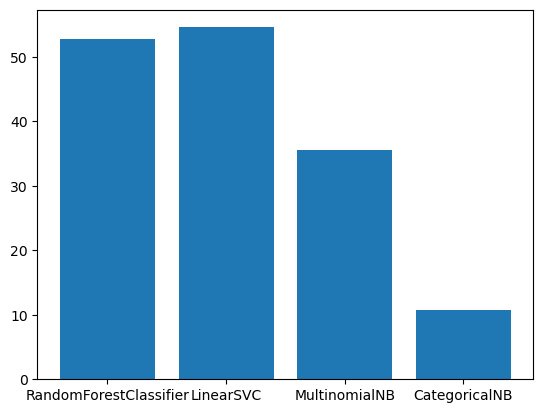

In [25]:
plt.bar(keys,acc)

In [26]:
for i in result:
    for key,value in i.items():
        print(key,' = ', value[1])

RandomForestClassifier  =                precision    recall  f1-score   support

           0       0.77      0.66      0.71       476
           1       0.81      0.35      0.49       251
           2       0.82      0.48      0.60       408
           3       0.96      0.61      0.75       243
           4       0.94      0.96      0.95      1073
           5       0.99      0.94      0.97       284
           6       0.85      0.12      0.22        88

   micro avg       0.90      0.73      0.80      2823
   macro avg       0.88      0.59      0.67      2823
weighted avg       0.89      0.73      0.78      2823
 samples avg       0.80      0.70      0.72      2823

LinearSVC  =                precision    recall  f1-score   support

           0       0.76      0.67      0.71       476
           1       0.73      0.48      0.58       251
           2       0.76      0.54      0.63       408
           3       0.95      0.67      0.79       243
           4       0.95      0.96    